In [3]:
import warnings
warnings.filterwarnings(action='ignore')
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC

In [4]:
#step1.selenium 패키지와 time 모듈 import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

#step2.검색할 키워드 입력
query = input('검색할 키워드를 입력하세요: ')

#step3.크롬드라이버로 원하는 url로 접속
url = 'https://www.naver.com/'
driver = webdriver.Chrome('/usr/local/bin/chromedriver') #브라우저 실행
driver.get(url)
time.sleep(3)

#step4.검색창에 키워드 입력 후 엔터
search_box = driver.find_element_by_css_selector("input#query")
search_box.send_keys(query)
search_box.send_keys(Keys.RETURN) #form안에 있는 input의 값을 submit하는 역할!
time.sleep(2)

#step5.뉴스 탭 클릭
driver.find_element_by_css_selector('#lnb > div.lnb_group > div > ul > li:nth-child(9) > a').click()
# #lnb > div.lnb_group > div > ul > li:nth-child(9) > a

# time.sleep(2)
driver.implicitly_wait(2)

## 무조건 5초 대기
# time.sleep(5)

# 로딩 후 다음 동작 실행, 최대 5초까지 대기
# dr.implicitly_wait(5)

검색할 키워드를 입력하세요:  자동차


In [52]:
#step6.뉴스 제목 텍스트 추출
# #main_pack > section > div > div.group_news > ul
# #sp_nws1 > div > div > a
news_titles = driver.find_elements_by_css_selector("a.news_tit")

for i in news_titles:
    title = i.text
    print(title)

자동차방향제에 금지물질 'CMIT' 검출…판매금지·회수 조치
볼보자동차코리아, 지구촌 전등 끄기 캠페인 '어스아워' 동참
르노자동차 “러시아 공장 중단”…생산물량 한국으로 올까
자동차 검사지연 과태료 상향 조정
정부, '납·구리·캐스팅얼로이' 자동차 할당관세 적용 신속 검토
정부 "러·벨라루스 수출통제 시행…자동차 부품 추가 할당관세 검토"
'줄이고 멈추고' 반도체난 길어지는 글로벌 자동차업계
경주시, 자동차 검사지연 과태료 2배 상향…최대 60만 원
기아, 국내 자동차 브랜드 최초 'NFT' 발행한다
남원시 "자동차 검사지연 과태료 2배 상향"…30일 이내 기존 2만원→4만원


In [53]:
#step7.뉴스 하이퍼링크 추출

for i in news_titles:
    href = i.get_attribute('href')
    print(href)

http://www.newsis.com/view/?id=NISX20220325_0001807104&cID=10201&pID=10200
http://kr.aving.net/news/view.php?articleId=1693926&Branch_ID=kr&rssid=naver&mn_name=news
https://economist.co.kr/2022/03/25/industry/normal/20220325060113532.html
http://sjbnews.com/news/news.php?number=740076
http://www.edaily.co.kr/news/newspath.asp?newsid=01958166632266928
http://www.newsis.com/view/?id=NISX20220325_0001807344&cID=10401&pID=10400
http://moneys.mt.co.kr/news/mwView.php?no=2022032517128074040
https://www.nocutnews.co.kr/news/5728565
http://news.tf.co.kr/read/economy/1926434.htm
https://www.news1.kr/articles/?4626022


In [54]:
#step8.뉴스 썸네일 이미지 추출

news_thumbnail = driver.find_elements_by_css_selector("img.thumb.api_get")

link_thumbnail = []

for img in news_thumbnail:
    
    link_thumbnail.append(img.get_attribute('src'))


# 이미지 저장할 폴더 생성

import os

# path_folder의 경로는 각자 저장할 폴더의 경로를 적어줄 것(ex.img_download)
path_folder = './'

if not os.path.isdir(path_folder):
    os.mkdir(path_folder)


# 이미지 다운로드

from urllib.request import urlretrieve

i = 0

for link in link_thumbnail:          
    i += 1
    urlretrieve(link, path_folder + f'{i}.jpg')        #link에서 이미지 다운로드, './imgs/'에 파일명은 index와 확장자명으로

In [55]:
!ls #windows에서는 !dir

1.jpg
10.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
6_2_CoffeeBeanCrawler.py
7.jpg
8.jpg
9.jpg
dynamic-crawl-dir.png
naver-car-result.png
자동차_naver_news.json
동적크롤링-insta-클릭.ipynb
동적크롤링-test0.ipynb
동적크롤링-홈텍스-클릭+iframe-test.ipynb
동적크롤링연습-네이버검색.ipynb
유튜브동적크롤링-test.ipynb
커피빈동적크롤링-test.ipynb
동적크롤링-test.ipynb
동적크롤링-test0.html
유튜브동적크롤링-test.html
커피빈동적크롤링-test.html


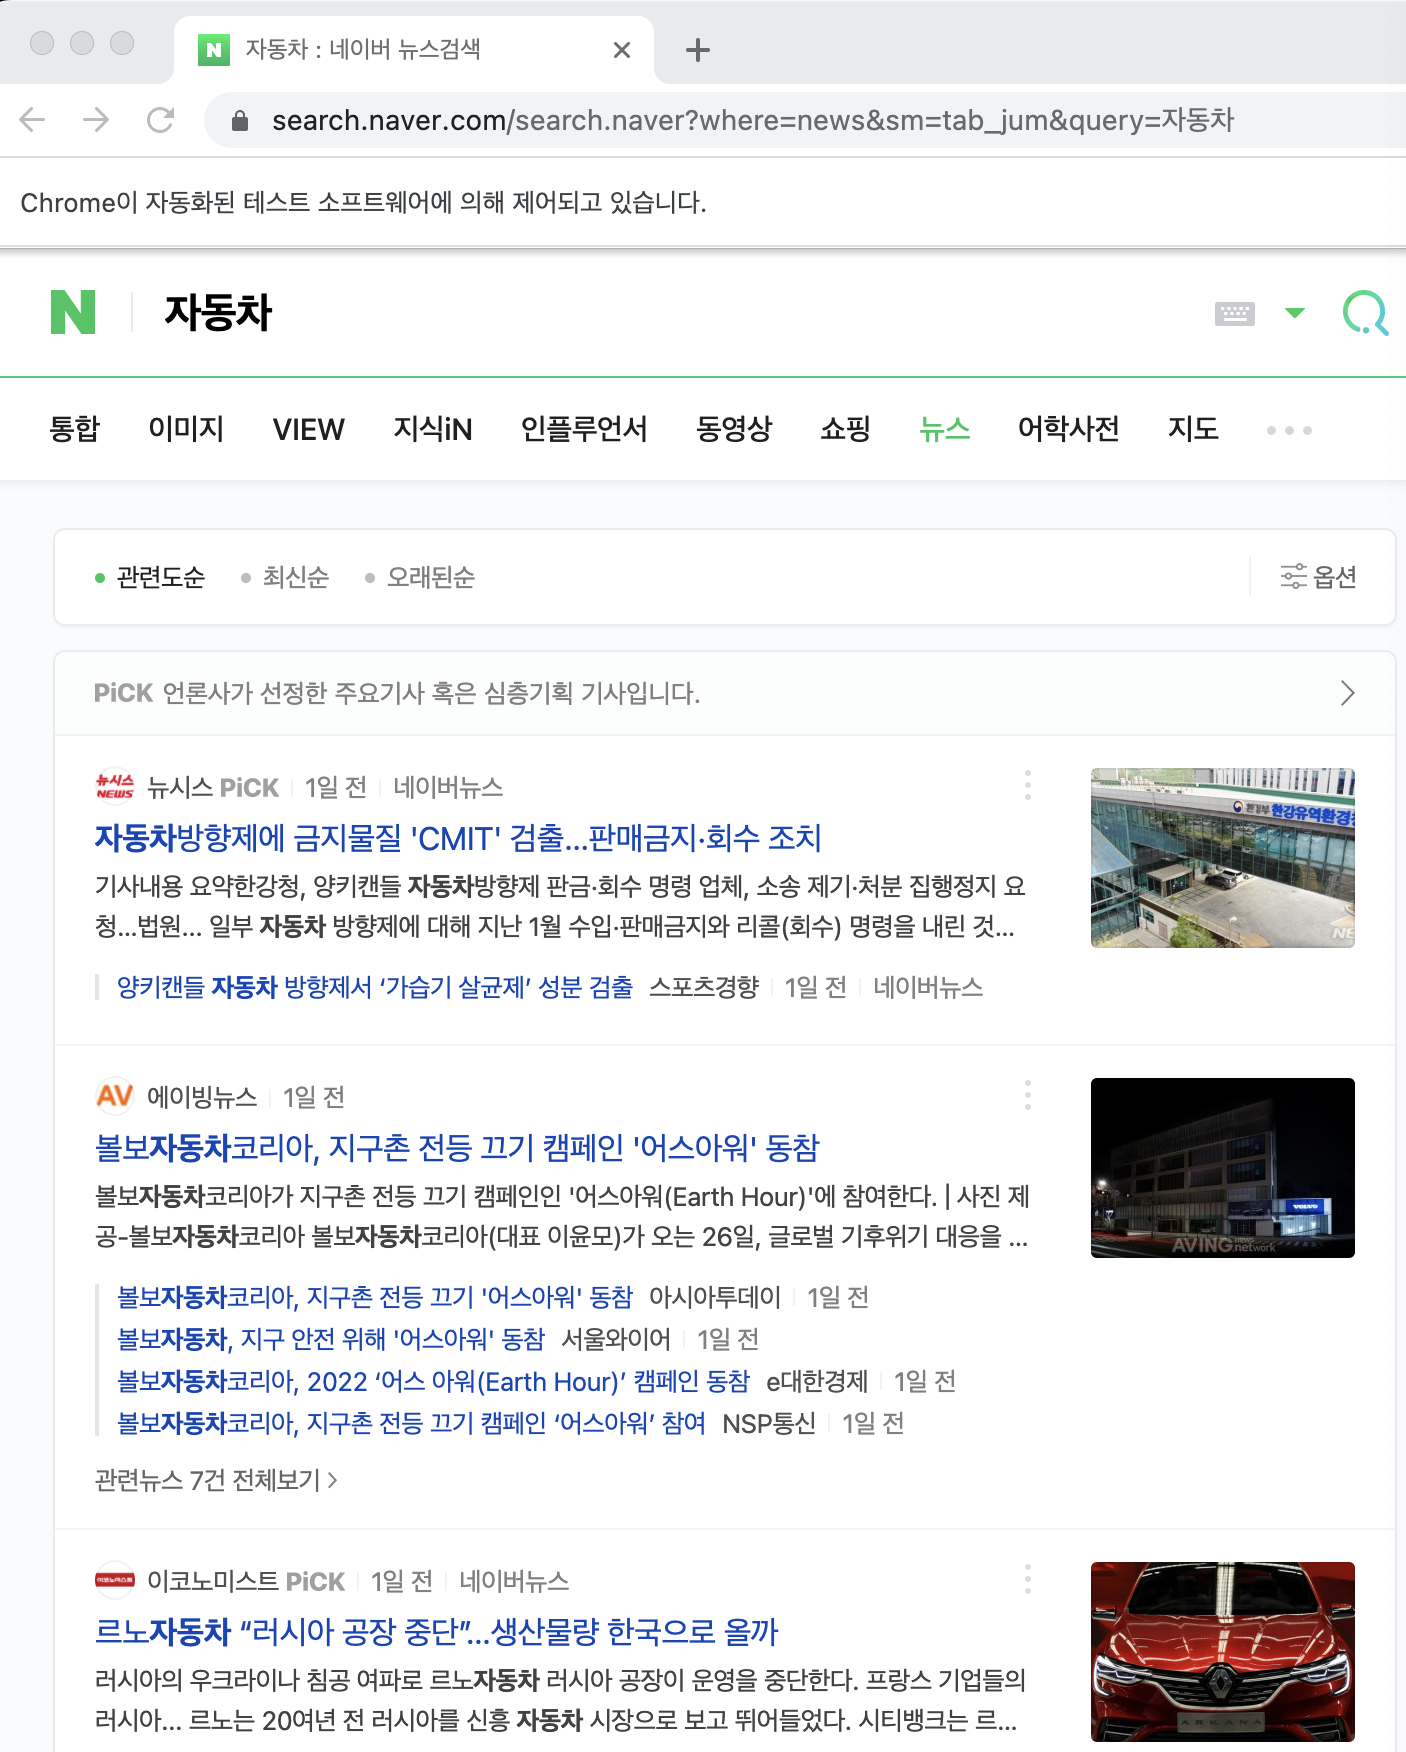

In [50]:
# 해당위치에 있는 파일 확인해보기
from IPython.display import Image
 
Image("./naver-car-result.png") # code안에서 나오게 할 때
#![title](./naver-car-result.png) # markdown안에서 나오게 할 때

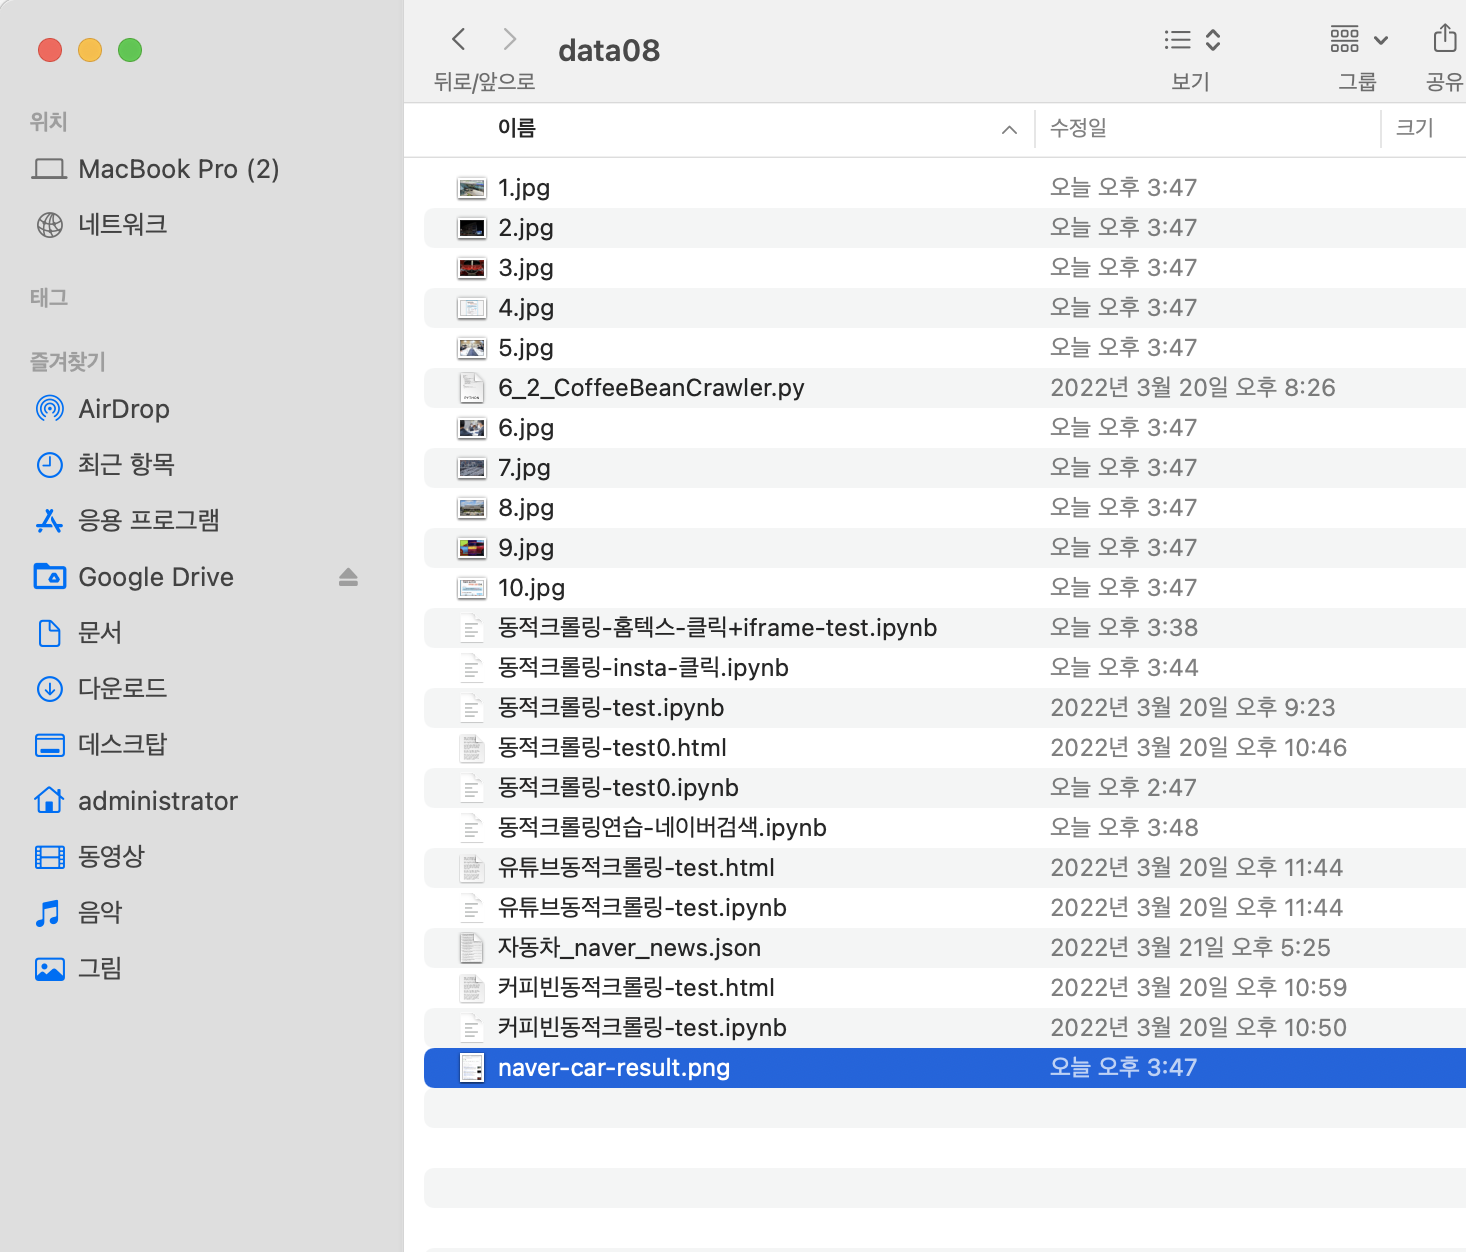

In [51]:
Image("./dynamic-crawl-dir.png") # code안에서 나오게 할 때